In [1]:
import libs.append_path
from add_python_libraries import *

#from circuit_4state import circuit_params as circuit_params_4state
#from circuit_2state import circuit_params as circuit_params_2state

from cyntec import Inductor_pdis #, create_ind_family_df,ind_pdis_obj, l_set, cyntec_filename

#from multiparam_multivar_lout_obj import Multiparam_multivar_df as mp_mv_df
from multiparam_multivar_generic import Multiparam_multivar_df as mp_mv_df

In [2]:
input_params = {'vin' : 20,
                'vout': 11.1,
                'pin' : 100, 
                'eff' : .97, 
                'fs'  :375e3,
                'ton_mult':1,
                'tambient':25,
                'lout':{'family'   :'hbed053t',
                        'value(uH)':0.33,
                        'config'   :'single'},
                'lvl_config':'3 level',
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

## Multiple Config Comparison

In [3]:
# input_config = {idx+1:new_params for idx,new_params in enumerate([    
#                 {'ton_mult':1,'lout':{'family'   :'hbed053t',
#                                       'value(uH)':0.15,
#                                       'config'   :'single'}},    
#                 {'ton_mult':2,'lout':{'family'   :'hbed053t',
#                                       'value(uH)':0.33,
#                                       'config'   :'single'}},
#                 {'ton_mult':3,'lout':{'family'   :'hbed053t',
#                                       'value(uH)':0.47,
#                                       'config'   :'single'}}])}


In [3]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'ton_mult':0.5}, 
                {'ton_mult':1},
                {'ton_mult':1.5},
                {'ton_mult':2}])}


In [4]:
iout = np.arange(0.1,5,0.1).tolist()
var_list = {'param':'iout','values':iout}

In [5]:
df_all = mp_mv_df(Inductor_pdis,input_params,input_config,var_list)

In [7]:
#df_all.df

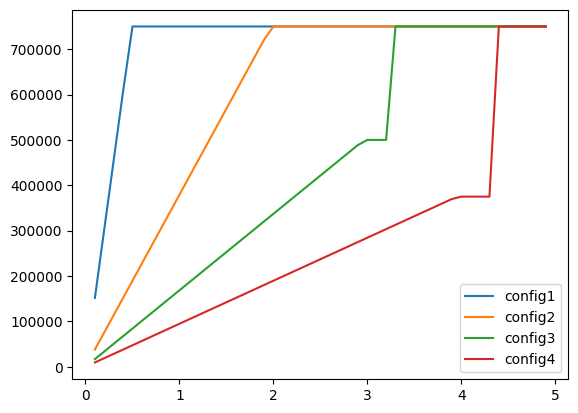

In [6]:
df_all.parametric_plot_Ton_mult()

In [ ]:
ip = input_params
lvl_config = ip['lvl_config']        
ckt_params = {'2 level':circuit_params_2state(ip),
              '3 level':circuit_params_4state(ip)}[lvl_config]

In [ ]:
ip['ton_mult']=2

In [ ]:
lobj_vs_iout={}
for iout in np.arange(0.1,5,0.1):
    ip['iout']=round(iout,1)
    ckt_params = {'2 level':circuit_params_2state(ip),
                  '3 level':circuit_params_4state(ip)}[lvl_config]
    lobj_vs_iout[iout]=ind_pdis_obj(ckt_params,ip['lout']['value(uH)'],create_ind_family_df(ip['lout']['family']))

In [ ]:
lobj_vs_iout[0.1].ipp

In [ ]:
fs_vs_iout = {round(iout,1):int(l_obj.fs_dcm) for iout,l_obj in lobj_vs_iout.items()}

In [ ]:
df= pd.DataFrame(fs_vs_iout.items(),columns=['iout','fs_dcm'])

In [ ]:
df.plot(x='iout',y='fs_dcm')